# IPL FIRST INNINGS SCORE PREDICTION

The dataset contains first innings score of the matches played between IPL teams of season 1 to 10, i.e fromm 2008 to 2017. This Machine Learning model adapts a Regression approach to predict the score of the First Innings of an IPL Match. The dataset is imported from Kaggle. The dataset consists of 76014 numbers of rows and 15 columns over which we applied feature selection techniques and selected 8 features in which 7 are input feature and 1 is our target variable. The attributes selected were venue, bat team, bowl team, overs, runs, wickets, runs in previous 5, wickets in previous 5 , total for score prediction. Our task is to determine the live first innings score/ projected score based on input features such as (venue, bat team, bowl team, overs, runs, wickets, runs in previous 5, wickets in previous 5) and also based on their previous stats/ records/ performance throughout the IPL (i.e 2008-2017)

# FEATURES:
    * mid            : match id
    * date           : when matches are played
    * venue          : Places where matches are played
    * bat_team       : batting team names among 8 teams in IPL
    * bowl_team      : bowling team names among 8 teams in IPL
    * batsman        : batsman
    * bowler         : bowler
    * runs           : runs scored(0-300)
    * overs          : (0-20)
    * wickets        : (0-10)
    * runs_last_5    : Runs scored in last 5 overs (0-300)
    * wickets_last_5 : Wickets fall in last 5 overs (0-10)
    * striker        : batsman playing as main 1
    * non-striker    : batsman playing as runner up- not main 0
    * total          : Total score(0-300)

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

# Load Dataset

In [2]:
df=pd.read_csv("C:/Users/HP/Desktop/ipl.csv")

# Exploring the dataset

In [3]:
#First 5 columns of the data
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [4]:
#Information (non-null count and data type) about each column
#Data contain 76014 non-null entries and a total of 15 columns
df.info()       

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [5]:
#Describing numerical values of the Dataset
df.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000


In [6]:
#Name of all columns in the dataset
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [7]:
# Number of Unique Values in each column
df.nunique()

mid               617
date              442
venue              35
bat_team           14
bowl_team          14
batsman           411
bowler            329
runs              252
wickets            11
overs             140
runs_last_5       102
wickets_last_5      8
striker           155
non-striker        88
total             138
dtype: int64

In [8]:
#Checking missing values in the dataset
df.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

Text(0.5, 1.0, 'Check Null values using visualization')

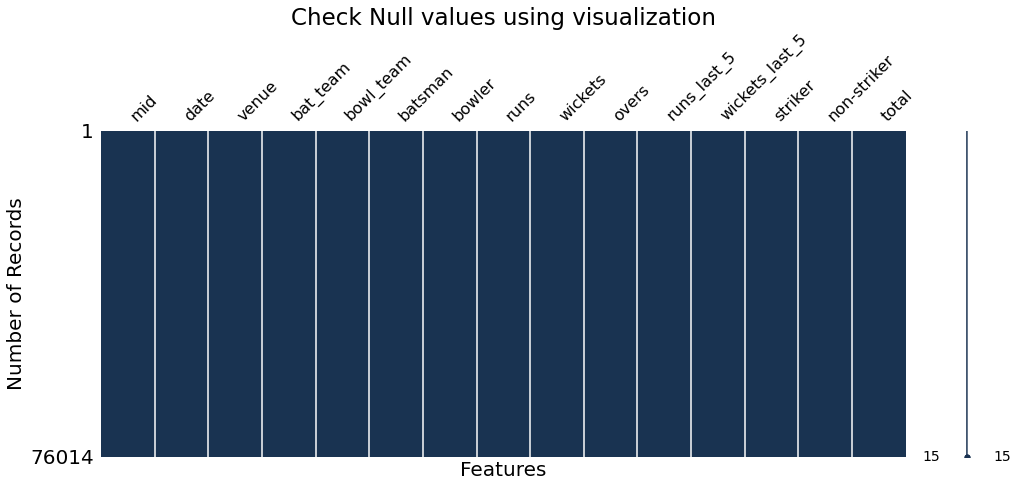

In [9]:
#Checking missing value using visualization
#No missing values present in the dataset
import missingno as mn
mn.matrix(df,figsize=(16,6),color=(0.10,0.20,0.32))
plt.xlabel('Features',fontdict={'fontsize':20})
plt.ylabel("Number of Records",fontdict={'fontsize':20})
plt.title("Check Null values using visualization",fontdict={'fontsize':23})



# Exploratory data analysis

In [10]:
#Number of unique batting team in the dataset
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [11]:
#Replacing Rising Pune Supergiant with Rising Pune Supergiants
df["bat_team"]=df["bat_team"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
df["bowl_team"]=df["bowl_team"].replace("Rising Pune Supergiant","Rising Pune Supergiants")

In [12]:
#Number of unique venues in the dataset
df['venue'].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket St

<AxesSubplot:>

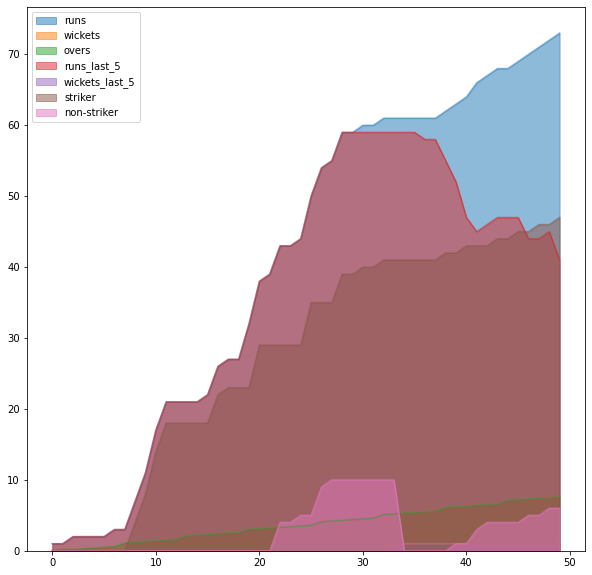

In [13]:
#Check Areas For Each Numerical Feature
# plot area / contributions in dataset
df[['date','venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker']][:50].plot(kind = 'area', figsize = (10,10), stacked = False)

In [14]:
#Converting the column 'date' from string into datetime object
from datetime import datetime

In [15]:
#Converting the date into corresponding year
df['date']=pd.to_datetime(df['date'],format='%d-%m-%Y')
df['year']=pd.DatetimeIndex(df['date']).year

In [16]:
#Total number of matches fromm 2008 to 2017
df['mid'].max()

617

In [17]:
#List of seasons in 2008 to 2017
df['year'].unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017],
      dtype=int64)

In [18]:
#First ball of IPL History
df.iloc[0]

mid                                         1
date                      2008-04-18 00:00:00
venue                   M Chinnaswamy Stadium
bat_team                Kolkata Knight Riders
bowl_team         Royal Challengers Bangalore
batsman                            SC Ganguly
bowler                                P Kumar
runs                                        1
wickets                                     0
overs                                     0.1
runs_last_5                                 1
wickets_last_5                              0
striker                                     0
non-striker                                 0
total                                     222
year                                     2008
Name: 0, dtype: object

In [19]:
#Name of team won the maximum runs
df.iloc[df['total'].idxmax()]

mid                                       343
date                      2013-04-23 00:00:00
venue                   M Chinnaswamy Stadium
bat_team          Royal Challengers Bangalore
bowl_team                       Pune Warriors
batsman                              CH Gayle
bowler                                B Kumar
runs                                        0
wickets                                     0
overs                                     0.1
runs_last_5                                 0
wickets_last_5                              0
striker                                     0
non-striker                                 0
total                                     263
year                                     2013
Name: 42229, dtype: object

In [20]:
#First team won the maximum wickets
df.iloc[df['wickets'].idxmax()]

mid                                   5
date                2008-04-20 00:00:00
venue                      Eden Gardens
bat_team                Deccan Chargers
bowl_team         Kolkata Knight Riders
batsman                        RP Singh
bowler                         M Kartik
runs                                110
wickets                              10
overs                              18.4
runs_last_5                          45
wickets_last_5                        5
striker                               1
non-striker                           0
total                               110
year                               2008
Name: 610, dtype: object

# Reducing data into matches based on total runs in every match

In [21]:
matches=df.groupby(['mid','date','venue','bat_team','bowl_team','total','year'])['striker'].count().reset_index()    

                                                            #Here striker defines the number of ball faced in each team.

In [22]:
matches

,mid,date,venue,bat_team,bowl_team,total,year,striker
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,222,2008,124
1,2,2008-04-19,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,Kings XI Punjab,240,2008,124
2,3,2008-04-19,Feroz Shah Kotla,Rajasthan Royals,Delhi Daredevils,129,2008,122
3,4,2008-04-20,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,165,2008,123
4,5,2008-04-20,Eden Gardens,Deccan Chargers,Kolkata Knight Riders,110,2008,118
...,...,...,...,...,...,...,...,...
612,613,2017-05-14,Maharashtra Cricket Association Stadium,Kings XI Punjab,Rising Pune Supergiants,73,2017,98
613,614,2017-05-14,Feroz Shah Kotla,Royal Challengers Bangalore,Delhi Daredevils,161,2017,127
614,615,2017-05-16,Wankhede Stadium,Rising Pune Supergiants,Mumbai Indians,162,2017,125
615,616,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,107,2017,116


# Sum of First Innings Final score of each team in the IPL Season 2008-2017

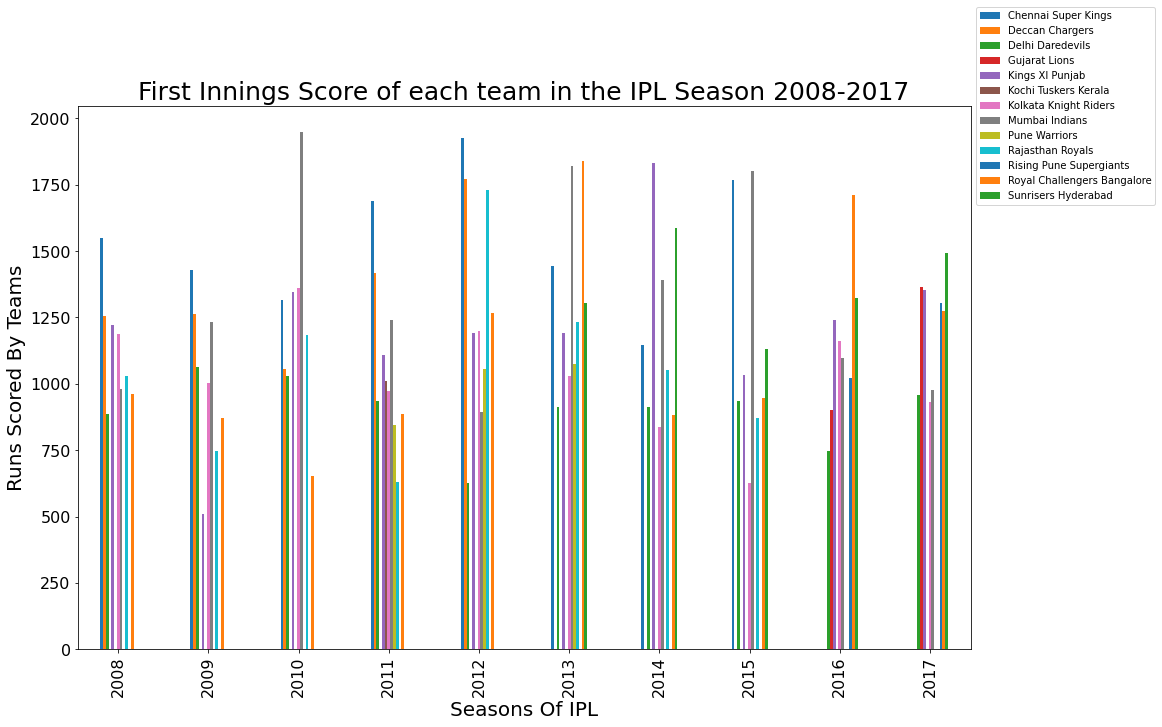

In [23]:
fig, ax = plt.subplots(figsize=(16,10))
deliveries_by_season = matches.groupby(['year' , 'bat_team']).sum()
deliveries_by_season['total'].unstack().plot(kind = 'bar',ax = ax, width = 0.4, fontsize = 16)
plt.title("First Innings Score of each team in the IPL Season 2008-2017" , fontsize = 25)
plt.ylabel("Runs Scored By Teams" ,fontsize = 20)
plt.xlabel("Seasons Of IPL", fontsize = 20)
ax.legend(loc='center left', bbox_to_anchor=(1, 1))

# Number of matches at each venue

In [24]:
#Most IPL Matches played in a Venue
df.groupby(['venue','mid']).count().droplevel(level=1).index.value_counts()

M Chinnaswamy Stadium                                   61
Eden Gardens                                            58
Wankhede Stadium                                        57
Feroz Shah Kotla                                        57
MA Chidambaram Stadium, Chepauk                         48
Rajiv Gandhi International Stadium, Uppal               47
Punjab Cricket Association Stadium, Mohali              35
Sawai Mansingh Stadium                                  33
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
Maharashtra Cricket Association Stadium                 15
Kingsmead                                               14
Sardar Patel Stadium, Motera                            12
Punjab Cricket Association IS Bindra Stadium, Mohali    11
Brabourne Stadium                                       11
SuperSport Park                                         11
Saurashtra Cricket Association Stadium                  

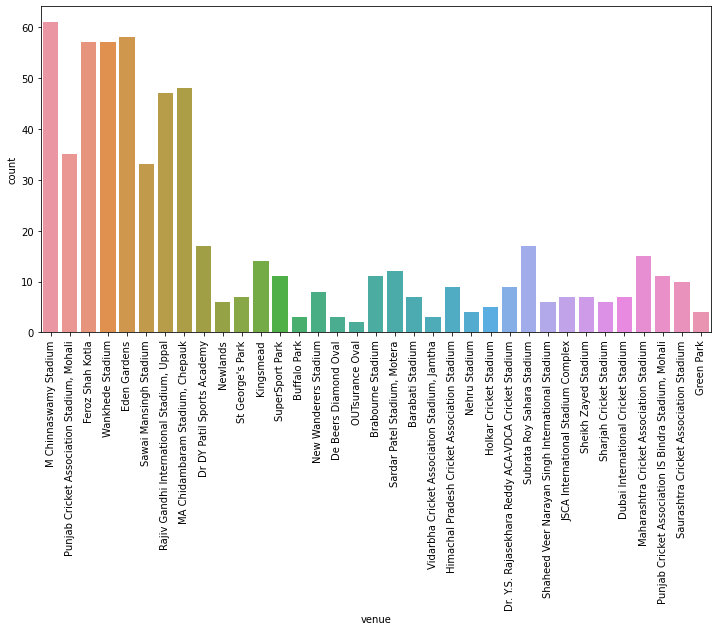

In [25]:
plt.figure(figsize=(12,6))
sns.countplot(x='venue', data=matches)
plt.xticks(rotation='vertical')
plt.show()


# Season Wise IPL Matches played

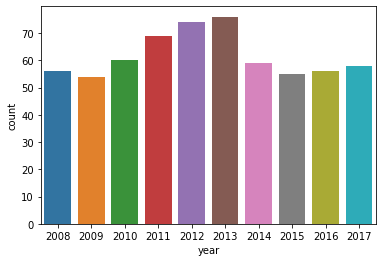

In [26]:
sns.countplot(x='year', data=matches)
plt.show()

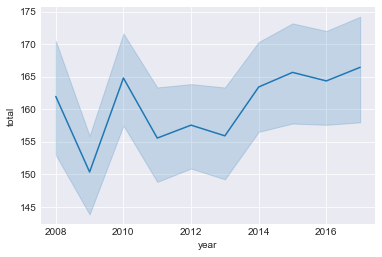

In [27]:
#Plotting lineplot using sns.lineplot()
#Average first innings runs scored across different seasons
plt.style.use('seaborn-darkgrid')
sns.lineplot(x=matches.year,y=matches.total,data=matches)
plt.show()

## Data Cleaning


...Removing unwanted columns...Here we can see that columns ['mid','batsman','bowler','striker','non-striker']
   won't provide any relevant information for our model

In [28]:
columns_to_remove=['mid','batsman','bowler','striker','non-striker']
df.drop(labels=columns_to_remove,axis=1,inplace=True)

In [29]:
df.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total,year
0,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222,2008
1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222,2008
2,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222,2008
3,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222,2008
4,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222,2008


In [30]:
df.index

RangeIndex(start=0, stop=76014, step=1)

In [31]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions'], dtype=object)

In [32]:
#Keeping only consistent teams
consistent_teams=['Kolkata Knight Riders','Chennai Super Kings','Rajasthan Royals',
                 'Mumbai Indians','Kings XI Punjab','Royal Challengers Bangalore', 'Delhi Daredevils',
                 'Sunrisers Hyderabad']

In [33]:
df=df[(df['bat_team'].isin(consistent_teams)) & (df['bowl_team'].isin(consistent_teams))]

In [34]:
#Removing the first 5 overs data in every match
df=df[df['overs']>=5.0]

In [35]:
df.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total,year
32,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222,2008
33,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222,2008
34,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222,2008
35,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222,2008
36,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222,2008


In [36]:
print(df['bat_team'].unique())
print(df['bowl_team'].unique())

['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Kings XI Punjab' 'Royal Challengers Bangalore'
 'Delhi Daredevils' 'Sunrisers Hyderabad']
['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Rajasthan Royals' 'Mumbai Indians' 'Chennai Super Kings'
 'Kolkata Knight Riders' 'Sunrisers Hyderabad']


In [37]:
#Get correlation of all the features of the dataset
corr_matrix=df.corr()
top_corr_features=corr_matrix.index

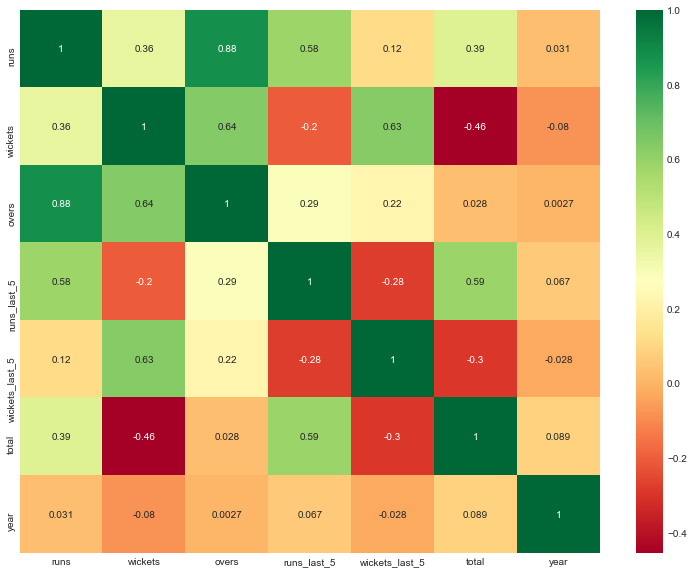

In [38]:
#Plotting the heatmap
plt.figure(figsize=(13,10))
g=sns.heatmap(data=df[top_corr_features].corr(),annot=True,cmap='RdYlGn')

In [39]:
df['venue'] = df['venue'].str.replace(r"[\"\',]", '')

In [40]:
df['venue'].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Sawai Mansingh Stadium',
       'MA Chidambaram Stadium Chepauk', 'Eden Gardens',
       'Dr DY Patil Sports Academy', 'Newlands', 'St Georges Park',
       'Kingsmead', 'SuperSport Park', 'Buffalo Park',
       'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium Motera',
       'Himachal Pradesh Cricket Association Stadium',
       'Subrata Roy Sahara Stadium',
       'Rajiv Gandhi International Stadium Uppal',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket Stadium',
       'Barabati Stadium', 'Maharashtra Cricket Association Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Punjab Cricket Association IS Bindra 

# Visualizing Outliers using Boxplot

In [41]:
sns.boxplot

<function seaborn.categorical.boxplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, ax=None, **kwargs)>

C:\Users\HP\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='runs'>

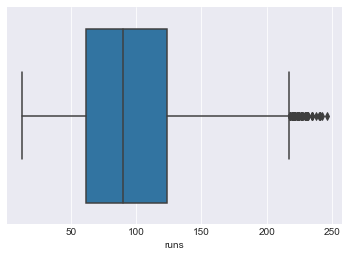

In [42]:
sns.boxplot(df['runs'])

C:\Users\HP\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='wickets'>

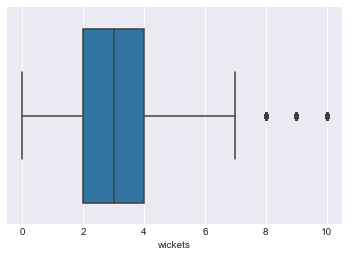

In [43]:
#Outliers in wickets
sns.boxplot(df['wickets'])

C:\Users\HP\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='runs_last_5'>

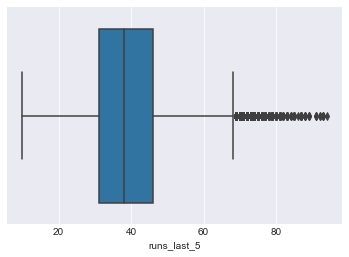

In [44]:
#Outliers in runs_last_5
sns.boxplot(df['runs_last_5'])

C:\Users\HP\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='wickets_last_5'>

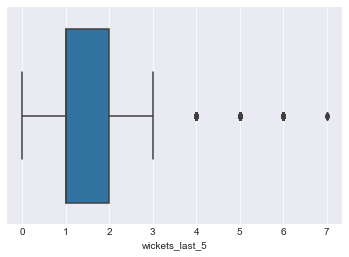

In [45]:
#Outliers in wickets_last_5
sns.boxplot(df['wickets_last_5'])

C:\Users\HP\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total'>

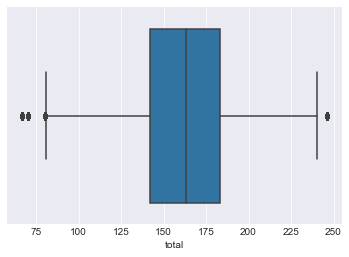

In [46]:
#outliers in total
sns.boxplot(df['total'])

#                   Removing Outliers

# Removing outliers in runs

In [47]:
from scipy import stats

In [48]:
#Calculating the Inter Quartile Range.
IQR=stats.iqr(df.runs,interpolation='midpoint')
IQR

62.0

In [49]:
Q1=df.runs.quantile(0.25)
Q3=df.runs.quantile(0.75)
min_limit=Q1 - 1.5*IQR
max_limit=Q3 + 1.5*IQR

In [50]:
min_limit,max_limit

(-31.0, 217.0)

In [51]:
df.loc[df['runs']>min_limit]

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total,year
32,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222,2008
33,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222,2008
34,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222,2008
35,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222,2008
36,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222,2008
...,...,...,...,...,...,...,...,...,...,...,...
75884,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,106,9,18.1,29,4,107,2017
75885,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,107,9,18.2,29,4,107,2017
75886,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,107,9,18.3,28,4,107,2017
75887,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,107,9,18.4,24,4,107,2017


In [52]:
df.loc[df['runs']>max_limit]

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total,year
123,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,222,3,19.6,68,1,222,2008
242,2008-04-19,Punjab Cricket Association Stadium Mohali,Chennai Super Kings,Kings XI Punjab,221,5,19.1,74,1,240,2008
243,2008-04-19,Punjab Cricket Association Stadium Mohali,Chennai Super Kings,Kings XI Punjab,227,5,19.2,79,1,240,2008
244,2008-04-19,Punjab Cricket Association Stadium Mohali,Chennai Super Kings,Kings XI Punjab,231,5,19.3,81,1,240,2008
245,2008-04-19,Punjab Cricket Association Stadium Mohali,Chennai Super Kings,Kings XI Punjab,232,5,19.4,81,1,240,2008
...,...,...,...,...,...,...,...,...,...,...,...
75051,2017-05-11,Wankhede Stadium,Kings XI Punjab,Mumbai Indians,222,3,19.3,49,1,230,2017
75052,2017-05-11,Wankhede Stadium,Kings XI Punjab,Mumbai Indians,223,3,19.3,43,1,230,2017
75053,2017-05-11,Wankhede Stadium,Kings XI Punjab,Mumbai Indians,223,3,19.4,41,1,230,2017
75054,2017-05-11,Wankhede Stadium,Kings XI Punjab,Mumbai Indians,224,3,19.5,41,1,230,2017


In [53]:
df.loc[df['runs']>max_limit,'runs']=max_limit

In [54]:
df.loc[df['runs']>max_limit]

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total,year


C:\Users\HP\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='runs'>

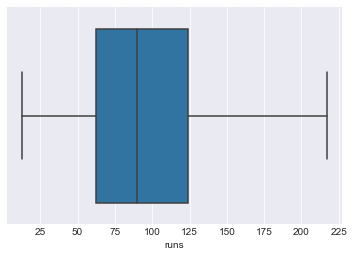

In [55]:
sns.boxplot(df['runs'])

# Removing outliers in Wickets

In [56]:
IQR=stats.iqr(df.wickets,interpolation='midpoint')
IQR

2.0

In [57]:
Q1=df.wickets.quantile(0.25)
Q3=df.wickets.quantile(0.75)
min_limit=Q1 - 1.5*IQR
max_limit=Q3 + 1.5*IQR

In [58]:
min_limit,max_limit

(-1.0, 7.0)

In [59]:
df.loc[df['wickets']>min_limit]

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total,year
32,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61.0,0,5.1,59,0,222,2008
33,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61.0,1,5.2,59,1,222,2008
34,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61.0,1,5.3,59,1,222,2008
35,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61.0,1,5.4,59,1,222,2008
36,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61.0,1,5.5,58,1,222,2008
...,...,...,...,...,...,...,...,...,...,...,...
75884,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,106.0,9,18.1,29,4,107,2017
75885,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,107.0,9,18.2,29,4,107,2017
75886,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,107.0,9,18.3,28,4,107,2017
75887,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,107.0,9,18.4,24,4,107,2017


In [60]:
df.loc[df['wickets']>max_limit]

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total,year
352,2008-04-19,Feroz Shah Kotla,Rajasthan Royals,Delhi Daredevils,110.0,8,17.1,35,2,129,2008
353,2008-04-19,Feroz Shah Kotla,Rajasthan Royals,Delhi Daredevils,110.0,8,17.2,34,2,129,2008
354,2008-04-19,Feroz Shah Kotla,Rajasthan Royals,Delhi Daredevils,110.0,8,17.3,32,2,129,2008
355,2008-04-19,Feroz Shah Kotla,Rajasthan Royals,Delhi Daredevils,110.0,8,17.4,32,2,129,2008
356,2008-04-19,Feroz Shah Kotla,Rajasthan Royals,Delhi Daredevils,111.0,8,17.5,32,2,129,2008
...,...,...,...,...,...,...,...,...,...,...,...
75884,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,106.0,9,18.1,29,4,107,2017
75885,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,107.0,9,18.2,29,4,107,2017
75886,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,107.0,9,18.3,28,4,107,2017
75887,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,107.0,9,18.4,24,4,107,2017


In [61]:
df.loc[df['wickets']>max_limit,'wickets']=max_limit

In [62]:
df.loc[df['wickets']>max_limit]

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total,year


C:\Users\HP\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='wickets'>

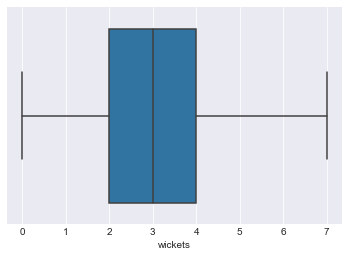

In [63]:
sns.boxplot(df['wickets'])

# Removing outliers in  Runs_last_5

In [64]:
IQR=stats.iqr(df.runs_last_5,interpolation='midpoint')
IQR

15.0

In [65]:
Q1=df.runs_last_5.quantile(0.25)
Q3=df.runs_last_5.quantile(0.75)
min_limit=Q1 - 1.5*IQR
max_limit=Q3 + 1.5*IQR

In [66]:
min_limit,max_limit

(8.5, 68.5)

In [67]:
df.loc[df['runs_last_5']>min_limit]

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total,year
32,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61.0,0.0,5.1,59,0,222,2008
33,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61.0,1.0,5.2,59,1,222,2008
34,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61.0,1.0,5.3,59,1,222,2008
35,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61.0,1.0,5.4,59,1,222,2008
36,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61.0,1.0,5.5,58,1,222,2008
...,...,...,...,...,...,...,...,...,...,...,...
75884,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,106.0,7.0,18.1,29,4,107,2017
75885,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,107.0,7.0,18.2,29,4,107,2017
75886,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,107.0,7.0,18.3,28,4,107,2017
75887,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,107.0,7.0,18.4,24,4,107,2017


In [68]:
df.loc[df['runs_last_5']>max_limit]

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total,year
118,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,206.0,3.0,19.1,71,1,222,2008
119,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,212.0,3.0,19.2,71,1,222,2008
120,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,214.0,3.0,19.3,69,1,222,2008
218,2008-04-19,Punjab Cricket Association Stadium Mohali,Chennai Super Kings,Kings XI Punjab,167.0,4.0,15.1,70,1,240,2008
219,2008-04-19,Punjab Cricket Association Stadium Mohali,Chennai Super Kings,Kings XI Punjab,167.0,4.0,15.2,70,1,240,2008
...,...,...,...,...,...,...,...,...,...,...,...
73236,2017-04-30,Rajiv Gandhi International Stadium Uppal,Sunrisers Hyderabad,Kolkata Knight Riders,86.0,0.0,6.2,71,0,209,2017
73686,2017-05-02,Feroz Shah Kotla,Sunrisers Hyderabad,Delhi Daredevils,185.0,3.0,19.6,69,0,185,2017
74979,2017-05-11,Wankhede Stadium,Kings XI Punjab,Mumbai Indians,112.0,1.0,8.2,69,1,230,2017
74982,2017-05-11,Wankhede Stadium,Kings XI Punjab,Mumbai Indians,120.0,1.0,8.5,69,1,230,2017


In [69]:
df.loc[df['runs_last_5']>max_limit,'runs_last_5']=max_limit

In [70]:
df.loc[df['runs_last_5']>max_limit]

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total,year


C:\Users\HP\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='runs_last_5'>

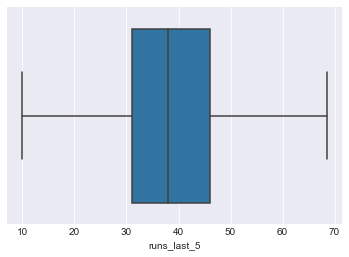

In [71]:
sns.boxplot(df['runs_last_5'])

# Removing outliers in Wickets_last_5

In [72]:
IQR=stats.iqr(df.wickets_last_5,interpolation='midpoint')
IQR

1.0

In [73]:
Q1=df.wickets_last_5.quantile(0.25)
Q3=df.wickets_last_5.quantile(0.75)
min_limit=Q1 - 1.5*IQR
max_limit=Q3 + 1.5*IQR


In [74]:
min_limit,max_limit

(-0.5, 3.5)

In [75]:
df.loc[df['wickets_last_5']>min_limit]

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total,year
32,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61.0,0.0,5.1,59.0,0,222,2008
33,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61.0,1.0,5.2,59.0,1,222,2008
34,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61.0,1.0,5.3,59.0,1,222,2008
35,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61.0,1.0,5.4,59.0,1,222,2008
36,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61.0,1.0,5.5,58.0,1,222,2008
...,...,...,...,...,...,...,...,...,...,...,...
75884,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,106.0,7.0,18.1,29.0,4,107,2017
75885,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,107.0,7.0,18.2,29.0,4,107,2017
75886,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,107.0,7.0,18.3,28.0,4,107,2017
75887,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,107.0,7.0,18.4,24.0,4,107,2017


In [76]:
df.loc[df['wickets_last_5']>max_limit]

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total,year
665,2008-04-21,Sawai Mansingh Stadium,Kings XI Punjab,Rajasthan Royals,73.0,4.0,8.5,49.0,4,166,2008
666,2008-04-21,Sawai Mansingh Stadium,Kings XI Punjab,Rajasthan Royals,73.0,4.0,9.6,49.0,4,166,2008
667,2008-04-21,Sawai Mansingh Stadium,Kings XI Punjab,Rajasthan Royals,77.0,4.0,9.1,49.0,4,166,2008
668,2008-04-21,Sawai Mansingh Stadium,Kings XI Punjab,Rajasthan Royals,81.0,4.0,9.2,47.0,4,166,2008
725,2008-04-21,Sawai Mansingh Stadium,Kings XI Punjab,Rajasthan Royals,149.0,7.0,18.5,37.0,4,166,2008
...,...,...,...,...,...,...,...,...,...,...,...
75884,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,106.0,7.0,18.1,29.0,4,107,2017
75885,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,107.0,7.0,18.2,29.0,4,107,2017
75886,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,107.0,7.0,18.3,28.0,4,107,2017
75887,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,107.0,7.0,18.4,24.0,4,107,2017


In [77]:
df.loc[df['wickets_last_5']>max_limit,'wickets_last_5']=max_limit

In [78]:
df.loc[df['wickets_last_5']>max_limit]

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total,year


C:\Users\HP\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='wickets_last_5'>

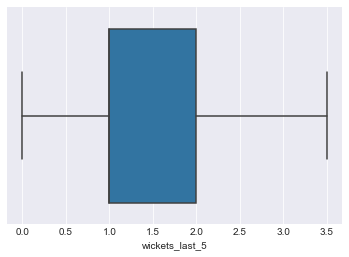

In [79]:
sns.boxplot(df['wickets_last_5'])

# Removing outliers in total

In [80]:
IQR=stats.iqr(df.total,interpolation='midpoint')
IQR

41.0

In [81]:
Q1=df.total.quantile(0.25)
Q3=df.total.quantile(0.75)
min_limit=Q1 - 1.5*IQR
max_limit=Q3 + 1.5*IQR


In [82]:
min_limit,max_limit

(80.5, 244.5)

In [83]:
df.loc[df['total']>min_limit]

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total,year
32,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61.0,0.0,5.1,59.0,0.0,222,2008
33,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61.0,1.0,5.2,59.0,1.0,222,2008
34,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61.0,1.0,5.3,59.0,1.0,222,2008
35,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61.0,1.0,5.4,59.0,1.0,222,2008
36,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61.0,1.0,5.5,58.0,1.0,222,2008
...,...,...,...,...,...,...,...,...,...,...,...
75884,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,106.0,7.0,18.1,29.0,3.5,107,2017
75885,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,107.0,7.0,18.2,29.0,3.5,107,2017
75886,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,107.0,7.0,18.3,28.0,3.5,107,2017
75887,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,107.0,7.0,18.4,24.0,3.5,107,2017


In [84]:
df.loc[df['total']>max_limit]

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total,year
17495,2010-04-03,MA Chidambaram Stadium Chepauk,Chennai Super Kings,Rajasthan Royals,50.0,0.0,5.1,49.0,0.0,246,2010
17496,2010-04-03,MA Chidambaram Stadium Chepauk,Chennai Super Kings,Rajasthan Royals,54.0,0.0,5.2,52.0,0.0,246,2010
17497,2010-04-03,MA Chidambaram Stadium Chepauk,Chennai Super Kings,Rajasthan Royals,58.0,0.0,5.3,52.0,0.0,246,2010
17498,2010-04-03,MA Chidambaram Stadium Chepauk,Chennai Super Kings,Rajasthan Royals,62.0,0.0,5.4,56.0,0.0,246,2010
17499,2010-04-03,MA Chidambaram Stadium Chepauk,Chennai Super Kings,Rajasthan Royals,62.0,1.0,5.5,55.0,1.0,246,2010
...,...,...,...,...,...,...,...,...,...,...,...
17582,2010-04-03,MA Chidambaram Stadium Chepauk,Chennai Super Kings,Rajasthan Royals,217.0,3.0,19.3,68.5,1.0,246,2010
17583,2010-04-03,MA Chidambaram Stadium Chepauk,Chennai Super Kings,Rajasthan Royals,217.0,4.0,19.4,68.5,2.0,246,2010
17584,2010-04-03,MA Chidambaram Stadium Chepauk,Chennai Super Kings,Rajasthan Royals,217.0,5.0,19.5,68.5,3.0,246,2010
17585,2010-04-03,MA Chidambaram Stadium Chepauk,Chennai Super Kings,Rajasthan Royals,217.0,5.0,19.5,68.5,3.0,246,2010


In [85]:
df.loc[df['total']>max_limit,'total']=max_limit

In [86]:
df.loc[df['total']>max_limit]

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total,year


C:\Users\HP\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total'>

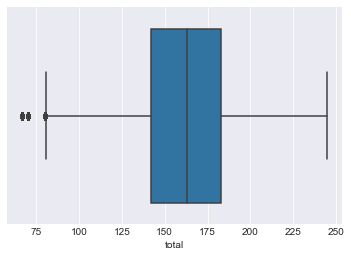

In [87]:
sns.boxplot(df['total'])

# Data Preprocessing

In [88]:
#---Data Preprocessing---
#Converting categorical features using OneHotEncoding method
encoded_df=pd.get_dummies(data=df,columns=['bat_team','bowl_team','venue'])
encoded_df.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'year', 'bat_team_Chennai Super Kings',
       'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
       'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians',
       'bat_team_Rajasthan Royals', 'bat_team_Royal Challengers Bangalore',
       'bat_team_Sunrisers Hyderabad', 'bowl_team_Chennai Super Kings',
       'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
       'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians',
       'bowl_team_Rajasthan Royals', 'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad', 'venue_Barabati Stadium',
       'venue_Brabourne Stadium', 'venue_Buffalo Park',
       'venue_De Beers Diamond Oval', 'venue_Dr DY Patil Sports Academy',
       'venue_Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'venue_Dubai International Cricket Stadium', 'venue_Eden Gardens',
       'venue_Feroz Shah Kotla',
   

In [89]:
encoded_df.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,year,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,...,venue_Rajiv Gandhi International Stadium Uppal,venue_Sardar Patel Stadium Motera,venue_Sawai Mansingh Stadium,venue_Shaheed Veer Narayan Singh International Stadium,venue_Sharjah Cricket Stadium,venue_Sheikh Zayed Stadium,venue_St Georges Park,venue_Subrata Roy Sahara Stadium,venue_SuperSport Park,venue_Wankhede Stadium
32,2008-04-18,61.0,0.0,5.1,59.0,0.0,222.0,2008,0,0,...,0,0,0,0,0,0,0,0,0,0
33,2008-04-18,61.0,1.0,5.2,59.0,1.0,222.0,2008,0,0,...,0,0,0,0,0,0,0,0,0,0
34,2008-04-18,61.0,1.0,5.3,59.0,1.0,222.0,2008,0,0,...,0,0,0,0,0,0,0,0,0,0
35,2008-04-18,61.0,1.0,5.4,59.0,1.0,222.0,2008,0,0,...,0,0,0,0,0,0,0,0,0,0
36,2008-04-18,61.0,1.0,5.5,58.0,1.0,222.0,2008,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
## Sorting the columns for train_test_split

encoded_df = encoded_df[['date', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore','bat_team_Sunrisers Hyderabad', 'bowl_team_Chennai Super Kings',
       'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
       'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians',
       'bowl_team_Rajasthan Royals', 'bowl_team_Royal Challengers Bangalore','bowl_team_Sunrisers Hyderabad',
       'venue_Barabati Stadium', 'venue_Brabourne Stadium',
       'venue_Buffalo Park', 'venue_De Beers Diamond Oval',
       'venue_Dr DY Patil Sports Academy',
       'venue_Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'venue_Dubai International Cricket Stadium', 'venue_Eden Gardens',
       'venue_Feroz Shah Kotla',
       'venue_Himachal Pradesh Cricket Association Stadium',
       'venue_Holkar Cricket Stadium',
       'venue_JSCA International Stadium Complex', 'venue_Kingsmead',
       'venue_M Chinnaswamy Stadium', 'venue_MA Chidambaram Stadium Chepauk',
       'venue_Maharashtra Cricket Association Stadium',
       'venue_New Wanderers Stadium', 'venue_Newlands',
       'venue_OUTsurance Oval',
       'venue_Punjab Cricket Association IS Bindra Stadium Mohali',
       'venue_Punjab Cricket Association Stadium Mohali',
       'venue_Sardar Patel Stadium Motera', 'venue_Sawai Mansingh Stadium',
       'venue_Shaheed Veer Narayan Singh International Stadium',
       'venue_Sharjah Cricket Stadium', 'venue_Sheikh Zayed Stadium',
       'venue_St Georges Park', 'venue_Subrata Roy Sahara Stadium',
       'venue_SuperSport Park', 'venue_Wankhede Stadium','runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total']]

In [91]:
#Splitting the data into train and test
x_train=encoded_df.drop(labels='total',axis=1)[encoded_df['date'].dt.year<=2016]
x_test=encoded_df.drop(labels='total',axis=1)[encoded_df['date'].dt.year>=2017]

In [92]:
y_train=encoded_df[encoded_df['date'].dt.year <= 2016]['total'].values
y_test=encoded_df[encoded_df['date'].dt.year >= 2017]['total'].values

In [93]:
#Removing the date column
x_train.drop(labels='date',axis=True,inplace=True)
x_test.drop(labels='date',axis=True,inplace=True)

print("Training set: {} and Test set: {}".format(x_train.shape,x_test.shape,y_train.shape,y_test.shape))

Training set: (37330, 51) and Test set: (2778, 51)


In [94]:
#checking shape
print(x_train.shape , y_train.shape)
print(x_test.shape , y_test.shape)

(37330, 51) (37330,)
(2778, 51) (2778,)


In [95]:
# use display to cross check in single line - only one
display("x_train", x_train.head(1))
display("x_test", x_test.head(1))

'x_train'

,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,...,venue_Sheikh Zayed Stadium,venue_St Georges Park,venue_Subrata Roy Sahara Stadium,venue_SuperSport Park,venue_Wankhede Stadium,runs,wickets,overs,runs_last_5,wickets_last_5
32,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,61.0,0.0,5.1,59.0,0.0


'x_test'

,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,...,venue_Sheikh Zayed Stadium,venue_St Georges Park,venue_Subrata Roy Sahara Stadium,venue_SuperSport Park,venue_Wankhede Stadium,runs,wickets,overs,runs_last_5,wickets_last_5
68894,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,46.0,1.0,5.1,42.0,1.0


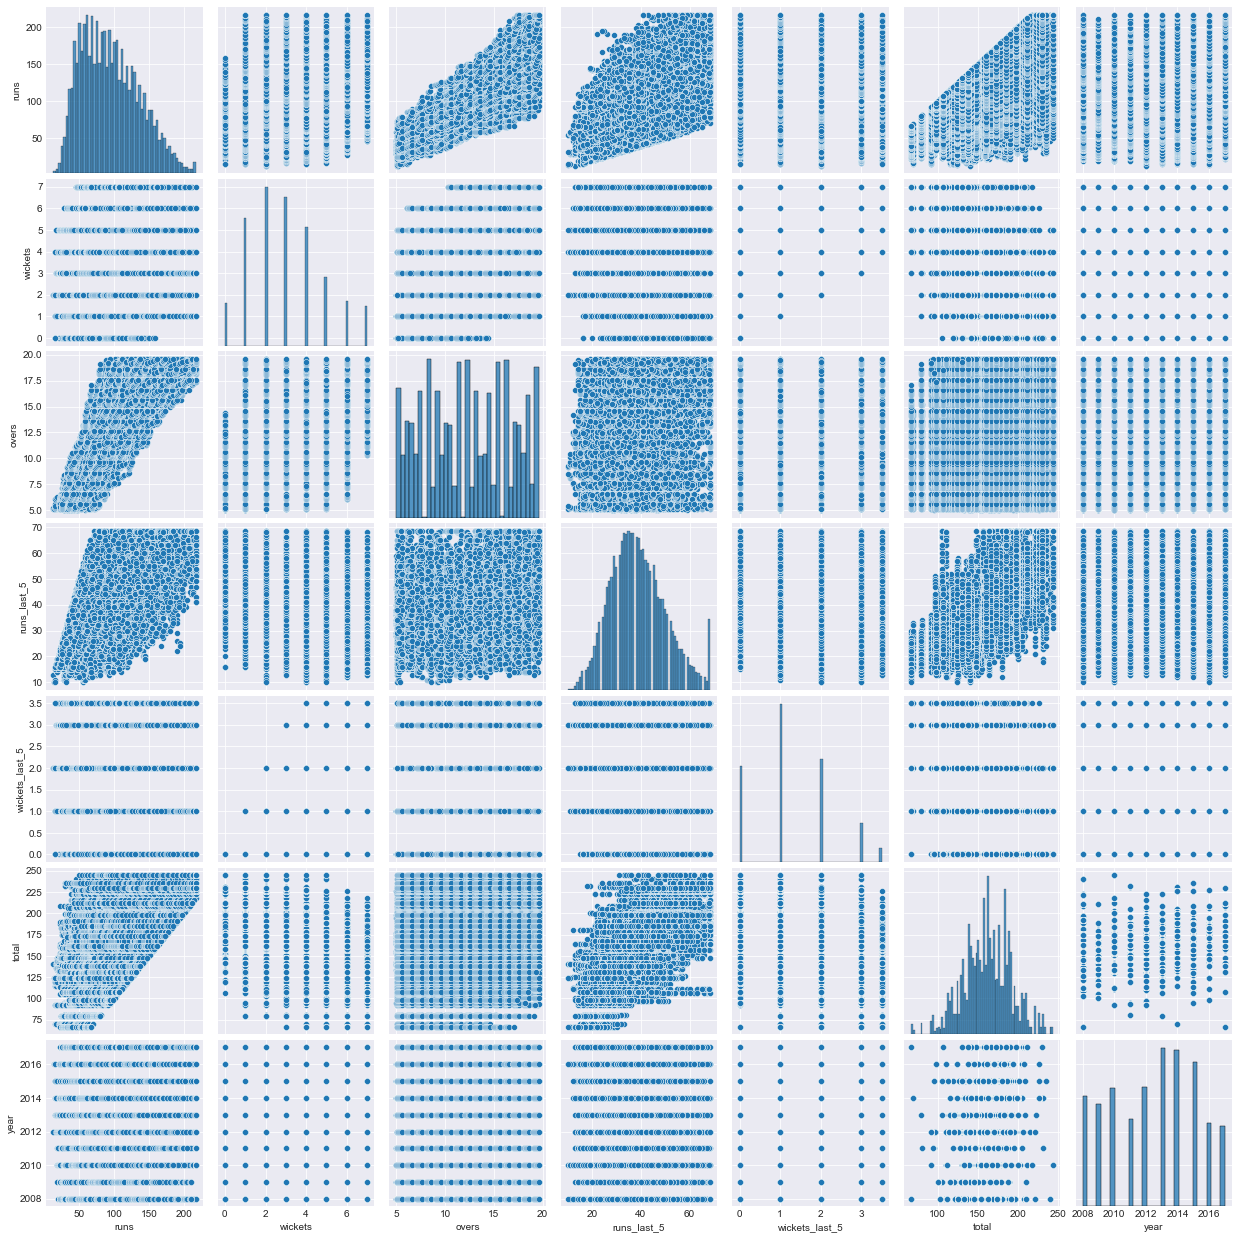

In [96]:
sns.pairplot(df)

# Model Building

# Linear Regression

In [96]:
from sklearn.linear_model import LinearRegression
linear_regressor=LinearRegression()
linear_regressor.fit(x_train,y_train)

LinearRegression()

In [97]:
#Predicting results using test set
pred_lr=linear_regressor.predict(x_test)
pred_lr

array([166.55801477, 169.51579457, 169.00876073, ..., 114.73885644,
       114.34277652, 113.78026572])

In [98]:
# Linear Regression - Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Calculating MAE, MSE, RMSE, R^2, Adjusted R^2
MAE = mean_absolute_error((y_test),(pred_lr))
print("MAE :", MAE)

MSE = mean_squared_error((y_test),(pred_lr))
print("MSE :", MSE)

RMSE = np.sqrt(MSE)
print("RMSE :", RMSE)

R2 = r2_score((y_test), (pred_lr))
print("R2 :" , R2*100)

Adjusted_R2 =1-(1-r2_score(y_test,pred_lr))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2:", Adjusted_R2*100) 

MAE : 12.747227927247277
MSE : 289.42169378314986
RMSE : 17.01239823726067
R2 : 71.43502163273237
Adjusted R2: 70.9006071438363


C:\Users\HP\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

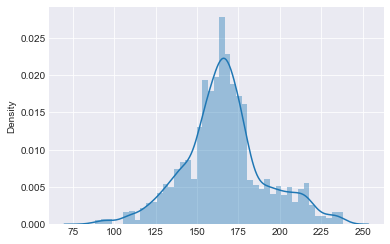

In [99]:
# plotting our fit
sns.distplot(pred_lr)

# Decision Tree Regressor

In [100]:
from sklearn.tree import DecisionTreeRegressor
decision_regressor=DecisionTreeRegressor()
decision_regressor.fit(x_train,y_train)

DecisionTreeRegressor()

In [101]:
#Predicting results using test set
pred_tree=decision_regressor.predict(x_test)
pred_tree


array([194., 194., 194., ..., 117., 117., 115.])

In [102]:
from sklearn import metrics

In [110]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_tree))
print('MSE:', metrics.mean_squared_error(y_test, pred_tree))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_tree)))
R2 = r2_score((y_test), (pred_tree))
print("R2 :" , R2*100)

Adjusted_R2 =1-(1-r2_score(y_test,pred_tree))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2:", Adjusted_R2*100) 

MAE: 17.70374370050396
MSE: 564.8506119510439
RMSE: 23.76658603903901
R2 : 44.25108463635551
Adjusted R2: 43.208093189713594


C:\Users\HP\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

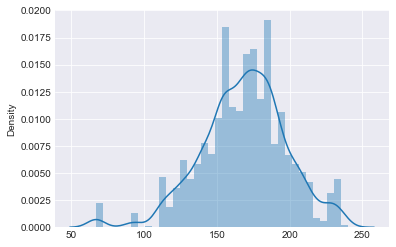

In [111]:
# plotting our fit
sns.distplot(pred_tree)

# Random Forest Regressor

In [112]:
from sklearn.ensemble import RandomForestRegressor
random_regressor=RandomForestRegressor()
random_regressor.fit(x_train,y_train)

RandomForestRegressor()

In [113]:
#Predicting result using test set
pred_rf=random_regressor.predict(x_test)

In [114]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_rf))
print('MSE:', metrics.mean_squared_error(y_test, pred_rf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_rf)))
print('R2:', metrics.r2_score(y_test, pred_rf))
print('Adjusted_R2:',1-(1-r2_score(y_test,pred_rf))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MAE: 14.282178425725943
MSE: 361.6986633427326
RMSE: 19.018376990235854
R2: 0.6430152018391546
Adjusted_R2: 0.6363364693717286


C:\Users\HP\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

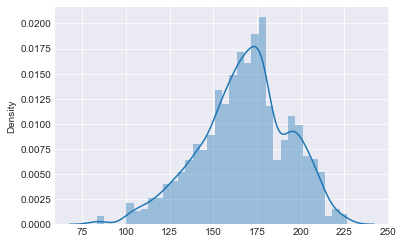

In [115]:
# plotting our fit
sns.distplot(pred_rf)

# Support Vector Regressor(SVR)

In [116]:
from sklearn.svm import SVR
svm=SVR()
#Train model
svm.fit(x_train,y_train)

SVR()

In [117]:
pred_svr=svm.predict(x_test)
pred_svr

array([168.68337292, 174.53944539, 172.32514717, ..., 127.25588237,
       124.23868198, 123.25123362])

In [118]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_svr))
print('MSE:', metrics.mean_squared_error(y_test, pred_svr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_svr)))
print('R2:', metrics.r2_score(y_test, pred_svr))
print('Adjusted_R2:',1-(1-r2_score(y_test,pred_svr))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MAE: 14.649815530748697
MSE: 369.1829253099713
RMSE: 19.214133477988835
R2: 0.6356284790819684
Adjusted_R2: 0.6288115504074197


C:\Users\HP\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

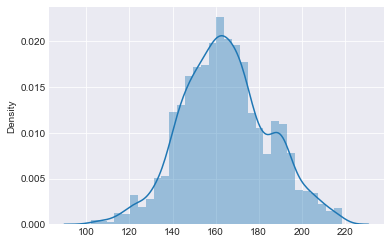

In [119]:
# plotting our fit
sns.distplot(pred_svr)

# Ridge Regression

In [103]:
#Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [104]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(x_train,y_train)

C:\Users\HP\anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.59123e-23): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\HP\anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.51002e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\HP\anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.59123e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\HP\anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.55079e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\HP\anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.56127e-18): result may not be accurate.
  return linalg.so

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [105]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 40}
-332.0125221777222


In [106]:
pred_ri=ridge_regressor.predict(x_test)
pred_ri

array([168.60096843, 171.56836844, 171.05867746, ..., 114.79651157,
       114.39827304, 113.83285583])

In [107]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred_ri))
print('MSE:', metrics.mean_squared_error(y_test, pred_ri))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_ri)))
print('R2:', metrics.r2_score(y_test, pred_ri))
print('Adjusted_R2:',1-(1-r2_score(y_test,pred_ri))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MAE: 12.428040160253191
MSE: 273.68284980624975
RMSE: 16.54336271156048
R2: 0.729883942629914
Adjusted_R2: 0.7248304140437531


C:\Users\HP\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

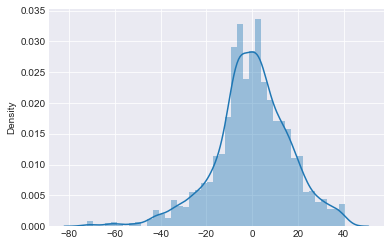

In [111]:
sns.distplot(y_test-pred_ri)

# Lasso Regression

In [126]:
#Lasso Regression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [127]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(x_train,y_train)

C:\Users\HP\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4251526.9354615575, tolerance: 2527.6816336693005
  model = cd_fast.enet_coordinate_descent(
C:\Users\HP\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3936941.7759971437, tolerance: 2547.0380710286627
  model = cd_fast.enet_coordinate_descent(
C:\Users\HP\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4273413.02753688, tolerance: 2665.533894736137
  model = cd_fast.enet_coordinate_descent(
C:\Users\HP\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective 

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [128]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1}
-318.52338089542286


In [129]:
pred_la=lasso_regressor.predict(x_test)
pred_la

array([171.12964324, 174.52863066, 173.7535811 , ..., 114.91648413,
       113.94193814, 113.26663679])

In [130]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_la))
print('MSE:', metrics.mean_squared_error(y_test, pred_la))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_la)))
print('R2:', metrics.r2_score(y_test, pred_la))
print('Adjusted_R2:',1-(1-r2_score(y_test,pred_la))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MAE: 12.185991780385397
MSE: 259.99649534765797
RMSE: 16.12440682157511
R2: 0.7433919286390536
Adjusted_R2: 0.7385911173259911


C:\Users\HP\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

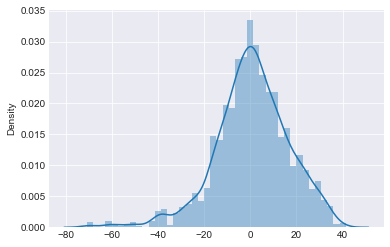

In [131]:
sns.distplot(y_test-pred_la)

In [135]:
Accuracy=pd.DataFrame(
{  "Models":["Linear Regression","Decision Tree","Random Forest","Support Vector Regressor","Ridge Regression","Lasso Regression"], 
   "r2_score":[71.435,40.872,64.198,63.56,72.988,74.339],
    "adjusted r2_score":[70.9,39.765,63.529,62.881,72.483,73.859]})
Accuracy

,Models,r2_score,adjusted r2_score
0,Linear Regression,71.435,70.900
1,Decision Tree,40.872,39.765
2,Random Forest,64.198,63.529
3,Support Vector Regressor,63.560,62.881
4,Ridge Regression,72.988,72.483
5,Lasso Regression,74.339,73.859


<AxesSubplot:>

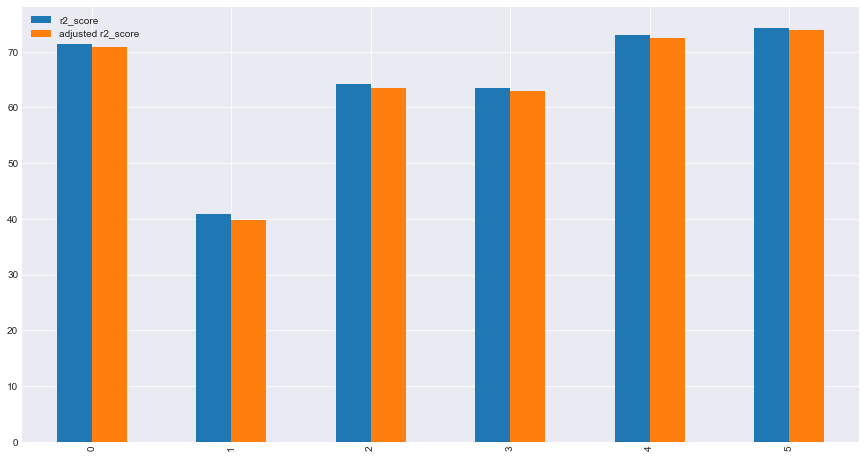

In [136]:
Accuracy.plot(kind='bar',figsize=(15,8))

# Predictions

In [108]:
def predict_score(bat_team, bowl_team,venue, runs, wickets, overs, runs_last_5, wickets_last_5, model=ridge_regressor):
    temp_array=list()
    
    #Batting Team
    if bat_team=='Chennai Super Kings':
        temp_array=temp_array + [1,0,0,0,0,0,0,0]
    elif bat_team=='Delhi Daredevils':
        temp_array=temp_array + [0,1,0,0,0,0,0,0]
    elif bat_team=='Kings XI Punjab':
        temp_array=temp_array + [0,0,1,0,0,0,0,0]
    elif bat_team=='Kolkata Knight Riders':
        temp_array=temp_array + [0,0,0,1,0,0,0,0]
    elif bat_team=='Mumbai Indians':
        temp_array=temp_array + [0,0,0,0,1,0,0,0]
    elif bat_team=='Rajasthan Royals':
        temp_array=temp_array + [0,0,0,0,0,1,0,0]
    elif bat_team=='Royal Challengers Bangalore':
        temp_array=temp_array + [0,0,0,0,0,0,1,0]
    elif bat_team=='Sunrisers Hyderabad':
        temp_array=temp_array + [0,0,0,0,0,0,0,1]
    
    #Bowling Team
   
    if bowl_team=='Chennai Super Kings':
        temp_array=temp_array + [1,0,0,0,0,0,0,0]
    elif bowl_team=='Delhi Daredevils':
        temp_array=temp_array + [0,1,0,0,0,0,0,0]
    elif bowl_team=='Kings XI Punjab':
        temp_array=temp_array + [0,0,1,0,0,0,0,0]
    elif bowl_team=='Kolkata Knight Riders':
        temp_array=temp_array + [0,0,0,1,0,0,0,0]
    elif bowl_team=='Mumbai Indians':
        temp_array=temp_array + [0,0,0,0,1,0,0,0]
    elif bowl_team=='Rajasthan Royals':
        temp_array=temp_array + [0,0,0,0,0,1,0,0]
    elif bowl_team=='Royal Challengers Bangalore':
        temp_array=temp_array + [0,0,0,0,0,0,1,0]
    elif bowl_team=='Sunrisers Hyderabad':
        temp_array=temp_array + [0,0,0,0,0,0,0,1]
    
         # Venue    
    if venue == 'venue_Barabati Stadium':
        temp_array = temp_array + [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    elif venue == 'venue_Brabourne Stadium':
        temp_array = temp_array + [0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    elif venue == 'venue_Buffalo Park':
        temp_array = temp_array + [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    elif venue == 'venue_De Beers Diamond Oval':
        temp_array = temp_array + [0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    elif venue == 'venue_Dr DY Patil Sports Academy':
        temp_array = temp_array + [0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    elif venue == 'venue_Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium':
        temp_array = temp_array + [0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    elif venue == 'venue_Dubai International Cricket Stadium':
        temp_array = temp_array + [0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    elif venue == 'venue_Eden Gardens':
        temp_array = temp_array + [0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    elif venue == 'venue_Feroz Shah Kotla':
        temp_array = temp_array + [0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    elif venue == 'venue_Himachal Pradesh Cricket Association Stadium':
        temp_array = temp_array + [0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    elif venue == 'venue_Holkar Cricket Stadium':
        temp_array = temp_array + [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    elif venue == 'venue_JSCA International Stadium Complex':
        temp_array = temp_array + [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    elif venue == 'venue_Kingsmead':
        temp_array = temp_array + [0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    elif venue == 'venue_M Chinnaswamy Stadium':
        temp_array = temp_array + [0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    elif venue == 'venue_MA Chidambaram Stadium Chepauk':
        temp_array = temp_array + [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    elif venue == 'venue_Maharashtra Cricket Association Stadium':
        temp_array = temp_array + [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    elif venue == 'venue_New Wanderers Stadium':
        temp_array = temp_array + [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0]
    elif venue == 'venue_Newlands':
        temp_array = temp_array + [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0]
    elif venue == 'venue_OUTsurance Oval':
        temp_array = temp_array + [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0]
    elif venue == 'venue_Punjab Cricket Association IS Bindra Stadium Mohali':
        temp_array = temp_array + [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0]
    elif venue == 'venue_Punjab Cricket Association Stadium Mohali':
        temp_array = temp_array + [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0]
    elif venue == 'venue_Sardar Patel Stadium Motera':
        temp_array = temp_array + [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0]
    elif venue == 'venue_Sawai Mansingh Stadium':
        temp_array = temp_array + [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0]
    elif venue == 'venue_Shaheed Veer Narayan Singh International Stadium':
        temp_array = temp_array + [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0]
    elif venue == 'venue_Sharjah Cricket Stadium':
        temp_array = temp_array + [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0]
    elif venue == 'venue_Sheikh Zayed Stadium':
        temp_array = temp_array + [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0]
    elif venue == 'venue_St Georges Park':
        temp_array = temp_array + [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0]
    elif venue == 'venue_Subrata Roy Sahara Stadium':
        temp_array = temp_array + [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0]
    elif venue == 'venue_SuperSport Park':
        temp_array = temp_array + [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]
    elif venue == 'venue_Wankhede Stadium':
        temp_array = temp_array + [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1]
    
   
    
    
    #Overs, Runs,Wickets,runs_in_prev_5,Wickets_in_prev_5
    temp_array = temp_array + [runs,wickets,overs,runs_last_5,wickets_last_5]
    
    # Converting into numpy array
    temp_array = np.array([temp_array])
    
    # Prediction
    return int(ridge_regressor.predict(temp_array)[[0]])
    

# Prediction 1

In [153]:
#...IPL 2018 FINAL ,May 27...
#...Wankade Stadium...
#...CSK Vs SRH...
#...Bat_team = SRH...
#...Bowl_team = CSK...
#..First Innings actual score=178...
#...First innings predicted score=174...


In [119]:
bat_team='Sunrisers Hyderabad'
bowl_team='Chennai Super Kings'
venue='venue_Wankhede Stadium'
score = predict_score(bat_team, bowl_team,venue, overs=12.1, runs=101, wickets=3, runs_last_5=50, wickets_last_5=2)
print("Predicted Score",score -5 ,'-', score+5,"Actual Score : 178")

Predicted Score 169 - 179 Actual Score : 178


# Prediction 2

In [155]:
#...IPL 2018 OPENING MATCH, April 7 ...
#...Venue : Wankade Stadium...
#...MI Vs CSK...
#...Bat_team=MI...
#...Bowl_team=CSK...
#...First innings actual score=165...
#...First innings predicted score=161...


In [120]:
bat_team='Mumbai Indians'
bowl_team='Chennai Super Kings'
venue='venue_Wankhede Stadium'
score = predict_score(bat_team, bowl_team,venue, overs=10, runs=65, wickets=2, runs_last_5=39, wickets_last_5=0)
print("Predicted Score",score -5 ,'-', score+5,"Actual Score : 165")

Predicted Score 156 - 166 Actual Score : 165


# Prediction 3

In [157]:
#...IPL 2018 49th match, May 15...
#...Venue : Eden Gardens, Kolkata...
#...Kolkatha Knight Riders vs Rajasthan Royals...
#...Bat_team =Kolkatha Knight Riders...
#...Bowl_team =Rajasthan Royals...
#...First innings actual score=142...
#...First innings predicted score=146...


In [121]:
bat_team='Rajasthan Royals'
bowl_team='Kolkata Knight Riders'
venue='venue_Eden Gardens'
score = predict_score(bat_team, bowl_team,venue, overs=12, runs=100, wickets=5, runs_last_5=26, wickets_last_5=4)
print("Predicted Score",score -5 ,'-', score+5,"Actual Score : 142")

Predicted Score 141 - 151 Actual Score : 142


# Prediction 4

In [159]:
#...IPL 2019 ,Qualifier 1, May 7...
#...Venue : MA Chidambaram Stadium, Chennai...
#...Mumbai Indians Vs Chennai Super Kings...
#...Bat_team = Chennai Super Kings...
#...Bowl_team = Mumbai Indians
#...First innings actual score=131...
#...First innings predicted score=127...


In [122]:
bat_team='Chennai Super Kings'
bowl_team='Mumbai Indians'
venue='venue_MA Chidambaram Stadium Chepauk'
score = predict_score(bat_team, bowl_team,venue, overs=13, runs=68, wickets=4, runs_last_5=24, wickets_last_5=1)
print("Predicted Score",score -5 ,'-', score+5,"Actual Score : 131")

Predicted Score 122 - 132 Actual Score : 131


# Prediction 5

In [161]:
#...IPL 2019 ,54th Match, May 4...
#...Venue : M.Chinnaswamy Stadium, Bengaluru...
#...Royal Challengers Bangalore Vs Sunrisers Hyderabad...
#...Bat_team = Sunrisers Hyderabad...
#...Bowl_team = Royal Challengers bangalore...
#...First innings actual score=175...
#...First innings predicted score=164...


In [123]:
bat_team='Sunrisers Hyderabad'
bowl_team='Royal Challengers Bangalore'
venue='venue_M Chinnaswamy Stadium'
score = predict_score(bat_team, bowl_team,venue, overs=14, runs=107, wickets=4, runs_last_5=44, wickets_last_5=1)
print("Predicted Score",score -5 ,'-', score+5,"Actual Score : 175")

Predicted Score 159 - 169 Actual Score : 175


# Prediction 6

In [163]:
#...IPL 2019 ,13th Match, April 1...
#...Venue : Punjab Cricket Association IS Bindra Stadium, Mohali...
#...Kings XI Punjab Vs Delhi Daredevils...
#...Bat_team : Kings XI Punjab
#...Bowl_team : Delhi Daredevils...
#...First innings actual score=166...
#...First innings predicted score=165...


In [124]:
bat_team='Kings XI Punjab'
bowl_team='Delhi Daredevils'
venue='venue_Punjab Cricket Association IS Bindra Stadium Mohali'
score = predict_score(bat_team, bowl_team,venue, overs=9, runs=75, wickets=3, runs_last_5=38, wickets_last_5=1)
print("Predicted Score",score -5 ,'-', score+5,"Actual Score : 166")

Predicted Score 160 - 170 Actual Score : 166


In [125]:
#Creating the pickle file
pickle.dump(linear_regressor, open('first-innings-score-ri-model.pkl', 'wb'))

In [126]:
model=pickle.load(open('first-innings-score-ri-model.pkl','rb'))

# Conclusion

The proposed work can help us predict accurate projected score in between a progressing match.This model provides us with score as accurate as 72.99% with the help of ridge regression.This analysis can be done by considering more factors like weather, batsman and bowler hence giving us better results. Also the previous match outcomes resulted due to super over must be separately analyzed and included in the model. This dynamic factors can change the outcome of the match in split seconds. Additional work can lead to obtain us a better model with much accurate predictions.